In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ebff08dea4c4bce65c886e5eeea9d58a


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | sur
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | hunza
City not found. Skipping...
Processing Record 8 of Set 1 | presidencia roque saenz pena
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 1 | viedma
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 |

Processing Record 38 of Set 4 | spencer
Processing Record 39 of Set 4 | port hedland
Processing Record 40 of Set 4 | lima
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | lokosovo
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | milingimbi
City not found. Skipping...
Processing Record 48 of Set 4 | bafoussam
Processing Record 49 of Set 4 | senno
Processing Record 50 of Set 4 | manyana
Processing Record 1 of Set 5 | ijaki
City not found. Skipping...
Processing Record 2 of Set 5 | kalevala
Processing Record 3 of Set 5 | temaraia
City not found. Skipping...
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | yokadouma
Processing Record 6 of Set 5 | leh
Processing Record 7 of Set 5 | guerrero negro
Processing Record 8 of Set 5 | tam ky
Processing Record 9 of Set 5 | b

Processing Record 23 of Set 8 | bardiyah
Processing Record 24 of Set 8 | celestun
Processing Record 25 of Set 8 | neijiang
Processing Record 26 of Set 8 | praia da vitoria
Processing Record 27 of Set 8 | brae
Processing Record 28 of Set 8 | ciro marina
Processing Record 29 of Set 8 | port hawkesbury
Processing Record 30 of Set 8 | lakatoro
Processing Record 31 of Set 8 | solnechnyy
Processing Record 32 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 33 of Set 8 | goderich
Processing Record 34 of Set 8 | alugan
Processing Record 35 of Set 8 | nieuw amsterdam
Processing Record 36 of Set 8 | virginia beach
Processing Record 37 of Set 8 | goba
Processing Record 38 of Set 8 | evensk
Processing Record 39 of Set 8 | poltsamaa
Processing Record 40 of Set 8 | sekoma
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | sayyan
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | demirci
Processing Record 45 of Set 8 | port lincoln
Pro

Processing Record 8 of Set 12 | timizart
Processing Record 9 of Set 12 | ca mau
Processing Record 10 of Set 12 | uvira
Processing Record 11 of Set 12 | nakusp
Processing Record 12 of Set 12 | miri
Processing Record 13 of Set 12 | tiffin
Processing Record 14 of Set 12 | kulu
Processing Record 15 of Set 12 | canada
Processing Record 16 of Set 12 | lata
Processing Record 17 of Set 12 | maulvi bazar
City not found. Skipping...
Processing Record 18 of Set 12 | mugur-aksy
Processing Record 19 of Set 12 | balimo
City not found. Skipping...
Processing Record 20 of Set 12 | paita
Processing Record 21 of Set 12 | beloha
Processing Record 22 of Set 12 | rorvik
Processing Record 23 of Set 12 | alotau
City not found. Skipping...
Processing Record 24 of Set 12 | lexington
Processing Record 25 of Set 12 | tecpan
Processing Record 26 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 12 | indiaroba
Processing Record 28 of Set 12 | kuche
City not found. Skipping...
Processin

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.45,74,40,16.11,CK,2022-12-01 01:40:43
1,Port Alfred,-33.5906,26.8910,65.17,94,100,0.67,ZA,2022-12-01 01:35:51
2,New Norfolk,-42.7826,147.0587,60.71,32,13,1.32,AU,2022-12-01 01:40:43
3,Sur,22.5667,59.5289,71.87,57,80,1.68,OM,2022-12-01 01:40:44
4,Presidencia Roque Saenz Pena,-26.7852,-60.4388,79.86,39,52,5.03,AR,2022-12-01 01:40:45
5,Punta Arenas,-53.1500,-70.9167,50.11,53,20,37.98,CL,2022-12-01 01:40:45
6,Barrow,71.2906,-156.7887,28.42,86,100,6.91,US,2022-12-01 01:38:57
7,Nanortalik,60.1432,-45.2371,26.91,78,62,32.66,GL,2022-12-01 01:36:24
8,Hilo,19.7297,-155.0900,86.29,81,0,9.22,US,2022-12-01 01:40:46
9,Saint-Francois,46.4154,3.9054,42.24,93,100,4.61,FR,2022-12-01 01:40:46


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-12-01 01:40:43,-21.2078,-159.7750,82.45,74,40,16.11
1,Port Alfred,ZA,2022-12-01 01:35:51,-33.5906,26.8910,65.17,94,100,0.67
2,New Norfolk,AU,2022-12-01 01:40:43,-42.7826,147.0587,60.71,32,13,1.32
3,Sur,OM,2022-12-01 01:40:44,22.5667,59.5289,71.87,57,80,1.68
4,Presidencia Roque Saenz Pena,AR,2022-12-01 01:40:45,-26.7852,-60.4388,79.86,39,52,5.03
5,Punta Arenas,CL,2022-12-01 01:40:45,-53.1500,-70.9167,50.11,53,20,37.98
6,Barrow,US,2022-12-01 01:38:57,71.2906,-156.7887,28.42,86,100,6.91
7,Nanortalik,GL,2022-12-01 01:36:24,60.1432,-45.2371,26.91,78,62,32.66
8,Hilo,US,2022-12-01 01:40:46,19.7297,-155.0900,86.29,81,0,9.22
9,Saint-Francois,FR,2022-12-01 01:40:46,46.4154,3.9054,42.24,93,100,4.61


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

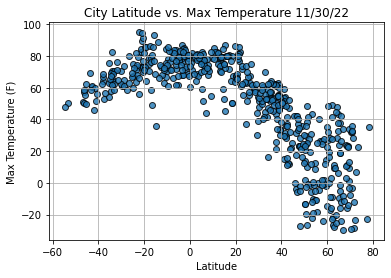

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_v_Max_Temp.png")

# Show plot.
plt.show()

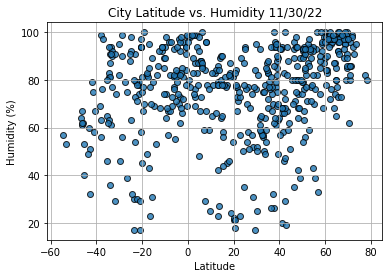

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_v_Humidity.png")
# Show plot.
plt.show()

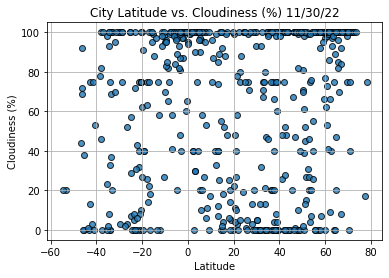

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_v_Cloudiness.png")
# Show plot.
plt.show()

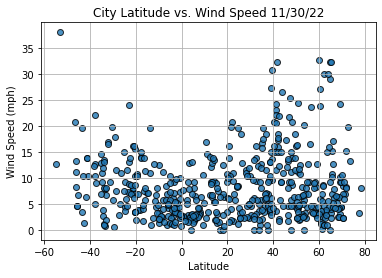

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_v_Wind_Speed.png")
# Show plot.
plt.show()